In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json
with open("news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json",'r') as f:
    datastore = json.load(f)
sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])
    


In [48]:
vocab_size = 1000
max_length = 32
embedding_dim = 24
padding_type = 'post'
trunc_type = 'post'
training_size = 20000
oov_tok = '<OOV>'

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer  = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences =  tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding = "post",maxlen = max_length, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, padding = "post",maxlen = max_length, truncating = trunc_type)


In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 32, 24)            24000     
_________________________________________________________________
global_average_pooling1d_3 ( (None, 24)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 24,625
Trainable params: 24,625
Non-trainable params: 0
_________________________________________________________________


In [50]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [51]:
num_epochs = 30
#history = model.fit(training_padded,training_labels,epochs = 30 , validation_data=(testing_padded,testing_labels), verbose = 2)
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 5s - loss: 0.5693 - accuracy: 0.7004 - val_loss: 0.4432 - val_accuracy: 0.7891
Epoch 2/30
20000/20000 - 3s - loss: 0.3903 - accuracy: 0.8231 - val_loss: 0.3984 - val_accuracy: 0.8153
Epoch 3/30
20000/20000 - 4s - loss: 0.3669 - accuracy: 0.8322 - val_loss: 0.3965 - val_accuracy: 0.8149
Epoch 4/30
20000/20000 - 4s - loss: 0.3606 - accuracy: 0.8350 - val_loss: 0.3979 - val_accuracy: 0.8158
Epoch 5/30
20000/20000 - 4s - loss: 0.3551 - accuracy: 0.8410 - val_loss: 0.4046 - val_accuracy: 0.8146
Epoch 6/30
20000/20000 - 3s - loss: 0.3526 - accuracy: 0.8393 - val_loss: 0.4020 - val_accuracy: 0.8152
Epoch 7/30
20000/20000 - 3s - loss: 0.3511 - accuracy: 0.8401 - val_loss: 0.4031 - val_accuracy: 0.8144
Epoch 8/30
20000/20000 - 3s - loss: 0.3497 - accuracy: 0.8416 - val_loss: 0.4062 - val_accuracy: 0.8135
Epoch 9/30
20000/20000 - 3s - loss: 0.3490 - accuracy: 0.8417 - val_loss: 0.4064 - val_accuracy: 0.8110
Epoch 10/30
200

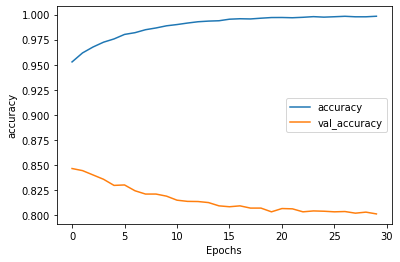

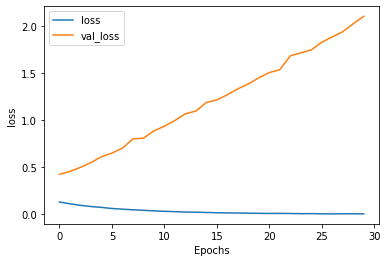

In [43]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [37]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[0])
print(labels[0])

former <OOV> store clerk sues over secret black code for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
former versace store clerk sues over secret black code for minority shoppers
0


In [38]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [44]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(padded)
print(model.predict(padded))

[[   1  890    2  891    1    5    4 2564  380   22  178    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [ 249    3    1  247 3385 2933   20 1551  259    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]]
[[9.818252e-01]
 [4.108190e-12]]
